In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_excel('data_full_sekres.xlsx')

In [7]:
df

,Unnamed: 0,datetime,battery_0__actualPower,thrusterAndPropulsion,sumEngMdoPower,hotelLoad,shorePowerEstimated,numberOfMdoEnginesRunning,operationId,dpMode,...,engMdoPower_2_,engMdoPower_3_,engMdoPerformance_0_,engMdoPerformance_1_,engMdoPerformance_2_,engMdoPerformance_3_,engMdoConsumption_0_,engMdoConsumption_1_,engMdoConsumption_2_,engMdoConsumption_3_
0,0,2020-01-30 00:00:00.000,0,0.0,0,250.0,250,0,6,0,...,0,0,0.0,0.000,0,0.000,0.0,0.00,0.0,0.00
1,1,2020-01-30 00:00:00.999,0,0.0,0,250.0,250,0,6,0,...,0,0,0.0,0.000,0,0.000,0.0,0.00,0.0,0.00
2,2,2020-01-30 00:00:01.999,0,0.0,0,250.0,250,0,6,0,...,0,0,0.0,0.000,0,0.000,0.0,0.00,0.0,0.00
3,3,2020-01-30 00:00:02.999,1,0.0,0,250.0,249,0,6,0,...,0,0,0.0,0.000,0,0.000,0.0,0.00,0.0,0.00
4,4,2020-01-30 00:00:04.000,1,0.0,0,250.0,249,0,6,0,...,0,0,0.0,0.000,0,0.000,0.0,0.00,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604795,604795,2020-02-05 23:59:55.007,-20,1386.0,2037,631.0,0,2,3,0,...,0,1043,0.0,222.037,0,210.362,0.0,255.15,0.0,253.65
604796,604796,2020-02-05 23:59:56.009,11,1408.0,2009,612.0,0,2,3,0,...,0,952,0.0,212.690,0,235.104,0.0,259.90,0.0,258.75
604797,604797,2020-02-05 23:59:57.007,11,1430.0,2116,697.0,0,2,3,0,...,0,1062,0.0,216.045,0,213.359,0.0,263.25,0.0,261.95
604798,604798,2020-02-05 23:59:58.008,17,1430.0,2015,602.0,0,2,3,0,...,0,996,0.0,223.550,0,222.416,0.0,263.35,0.0,256.10


# plotter akkumulerte utslipp

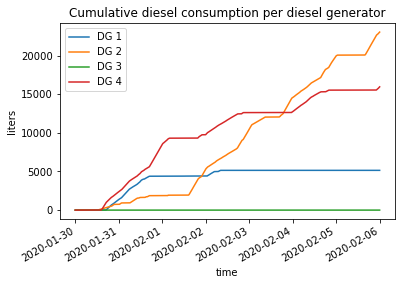

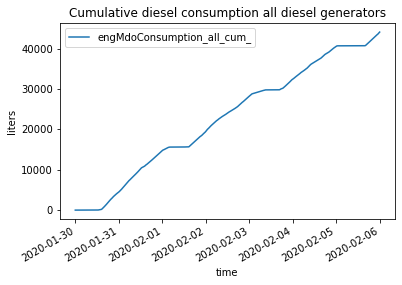

In [8]:
df['engMdoConsumption_0_cum_'] = df['engMdoConsumption_0_'].divide(3600).cumsum()
df['engMdoConsumption_1_cum_'] = df['engMdoConsumption_1_'].divide(3600).cumsum()
df['engMdoConsumption_2_cum_'] = df['engMdoConsumption_2_'].divide(3600).cumsum()
df['engMdoConsumption_3_cum_'] = df['engMdoConsumption_3_'].divide(3600).cumsum()

df['engMdoConsumption_all_cum_'] = df['engMdoConsumption_0_cum_'] + df['engMdoConsumption_1_cum_'] +  \
df['engMdoConsumption_2_cum_'] + df['engMdoConsumption_3_cum_']

df.plot(x='datetime', y=['engMdoConsumption_0_cum_', 'engMdoConsumption_1_cum_', \
                         'engMdoConsumption_2_cum_', 'engMdoConsumption_3_cum_'], \
                            label=['DG 1', 'DG 2', 'DG 3', 'DG 4'], \
                            title='Cumulative diesel consumption per diesel generator')
plt.xlabel('time')
plt.ylabel('liters')
plt.savefig('diesel_consumption_per')

df.plot(x='datetime', y='engMdoConsumption_all_cum_', title='Cumulative diesel consumption all diesel generators')
plt.xlabel('time')
plt.ylabel('liters')
plt.savefig('diesel_consumption_all')

In [9]:
print(df['engMdoConsumption_0_cum_'].iloc[-1])
print(df['engMdoConsumption_1_cum_'].iloc[-1])
print(df['engMdoConsumption_2_cum_'].iloc[-1])
print(df['engMdoConsumption_3_cum_'].iloc[-1])

print(df['engMdoConsumption_all_cum_'].iloc[-1])

5145.835513888794
23041.630513892218
1.04476388888889
15953.5392916704
44142.0500833403


In [10]:
df_transitEco = df.loc[df['operationId'] == 3]
df_transitFast = df.loc[df['operationId'] == 5]

df_transitEco['engMdoConsumption_0_cum_'] = df_transitEco['engMdoConsumption_0_'].divide(3600).cumsum()
df_transitEco['engMdoConsumption_1_cum_'] = df_transitEco['engMdoConsumption_1_'].divide(3600).cumsum()
df_transitEco['engMdoConsumption_2_cum_'] = df_transitEco['engMdoConsumption_2_'].divide(3600).cumsum()
df_transitEco['engMdoConsumption_3_cum_'] = df_transitEco['engMdoConsumption_3_'].divide(3600).cumsum()

df_transitEco['engMdoConsumption_all_cum_'] = df_transitEco['engMdoConsumption_0_cum_'] + \
df_transitEco['engMdoConsumption_1_cum_'] + df_transitEco['engMdoConsumption_2_cum_'] + \
df_transitEco['engMdoConsumption_3_cum_']

print(df_transitEco['engMdoConsumption_all_cum_'].iloc[-1])

25381.477527777613


<ipython-input-10-e0a32f487d9f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transitEco['engMdoConsumption_0_cum_'] = df_transitEco['engMdoConsumption_0_'].divide(3600).cumsum()
<ipython-input-10-e0a32f487d9f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transitEco['engMdoConsumption_1_cum_'] = df_transitEco['engMdoConsumption_1_'].divide(3600).cumsum()
<ipython-input-10-e0a32f487d9f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [11]:
mean = df['engMdoConsumption_0_'].mean() + df['engMdoConsumption_1_'].mean() + df['engMdoConsumption_2_'].mean()\
+ df['engMdoConsumption_3_'].mean()
print(mean)

tot = mean*(604800/3600)
print(tot)

262.75029811510717
44142.05008333801


In [12]:
df_1 = df.loc[df['operationId']==1]
df_3 = df.loc[df['operationId']==3]
df_5 = df.loc[df['operationId']==5]
df_7 = df.loc[df['operationId']==7]
df_100 = df.loc[df['operationId']==100]

mean1 = df_1['engMdoConsumption_0_'].mean() + df_1['engMdoConsumption_1_'].mean() + df_1['engMdoConsumption_2_'].mean()\
+ df_1['engMdoConsumption_3_'].mean()

mean3 = df_3['engMdoConsumption_0_'].mean() + df_3['engMdoConsumption_1_'].mean() + df_3['engMdoConsumption_2_'].mean()\
+ df_3['engMdoConsumption_3_'].mean()

mean5 = df_5['engMdoConsumption_0_'].mean() + df_5['engMdoConsumption_1_'].mean() + df_5['engMdoConsumption_2_'].mean()\
+ df_5['engMdoConsumption_3_'].mean()

mean7 = df_7['engMdoConsumption_0_'].mean() + df_7['engMdoConsumption_1_'].mean() + df_7['engMdoConsumption_2_'].mean()\
+ df_7['engMdoConsumption_3_'].mean()

mean100 = df_100['engMdoConsumption_0_'].mean() + df_100['engMdoConsumption_1_'].mean() + df_100['engMdoConsumption_2_'].mean()\
+ df_100['engMdoConsumption_3_'].mean()

print(mean1)
print(len(df_1))
print(mean3)
print(len(df_3))
print(mean5)
print(len(df_5))
print(mean7)
print(len(df_7))
print(mean100)
print(len(df_100))

102.46069796062122
5688
428.8860683977322
213048
395.51296959566946
12564
201.8203775269976
61585
342.05843586401426
143453


In [17]:
df_100['engMdoConsumption_0_cum_'] = df_100['engMdoConsumption_0_'].divide(3600).cumsum()
df_100['engMdoConsumption_1_cum_'] = df_100['engMdoConsumption_1_'].divide(3600).cumsum()
df_100['engMdoConsumption_2_cum_'] = df_100['engMdoConsumption_2_'].divide(3600).cumsum()
df_100['engMdoConsumption_3_cum_'] = df_100['engMdoConsumption_3_'].divide(3600).cumsum()

df_100['engMdoConsumption_all_cum_'] = df_100['engMdoConsumption_0_cum_'] + \
df_100['engMdoConsumption_1_cum_'] + df_100['engMdoConsumption_2_cum_'] + \
df_100['engMdoConsumption_3_cum_']

print(df_100['engMdoConsumption_all_cum_'].iloc[-1])

13630.363555556054


<ipython-input-17-7221c4d1b784>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_100['engMdoConsumption_0_cum_'] = df_100['engMdoConsumption_0_'].divide(3600).cumsum()
<ipython-input-17-7221c4d1b784>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_100['engMdoConsumption_1_cum_'] = df_100['engMdoConsumption_1_'].divide(3600).cumsum()
<ipython-input-17-7221c4d1b784>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v